In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [85]:
def load_data(file_path: str):
    df = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return df

directory_path = 'DATA/VEX_MAGNETO'
file_name = 'VEX-V-Y-MAG-4.csv'

df = load_data(os.path.join(directory_path, file_name))
df.head()

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC
date,,,,,,,,
2006-04-24 00:00:00,901.170761,887.078621,886.592311,901.582144,-3076.407309,-2872.475157,-67213.437339,67351.778022
2006-04-24 01:00:00,122.866044,107.284161,109.654450,123.584061,-56.789406,-2147.243992,-70446.888658,70485.459712
2006-04-24 02:00:00,230.881530,218.765052,216.810378,234.327848,2966.294489,-1402.796963,-72831.017578,72910.164160
2006-04-24 03:00:00,451.576201,437.057761,440.662270,455.704559,5959.518042,-649.828442,-74422.302150,74668.263456
2006-04-24 04:00:00,560.491882,547.190941,554.806417,566.054039,8894.553522,103.003431,-75259.615454,75788.153991


# Plot the data

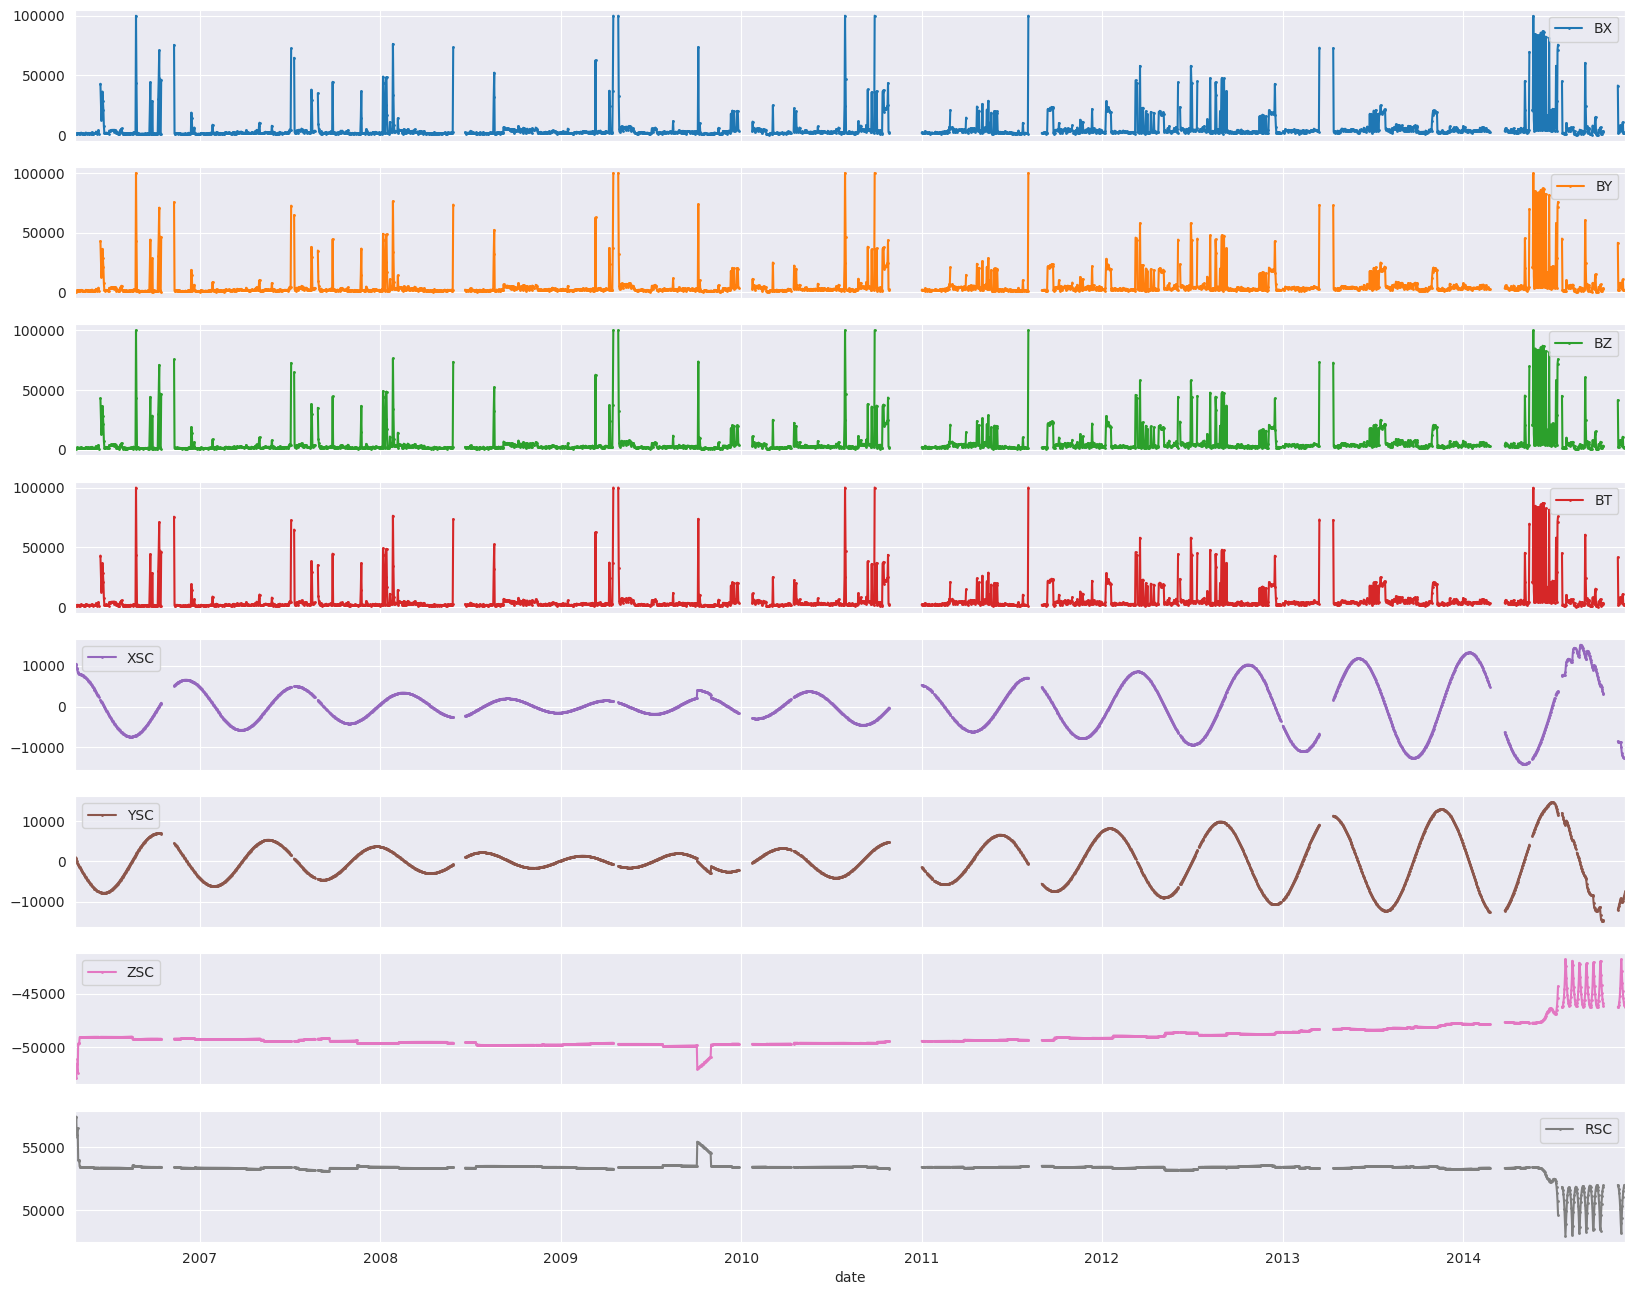

In [86]:
df = df.resample('D').mean()
df.plot(figsize=(20, 16), marker='o', markersize=1, subplots=True)
plt.show()

# Plot total magnetic field

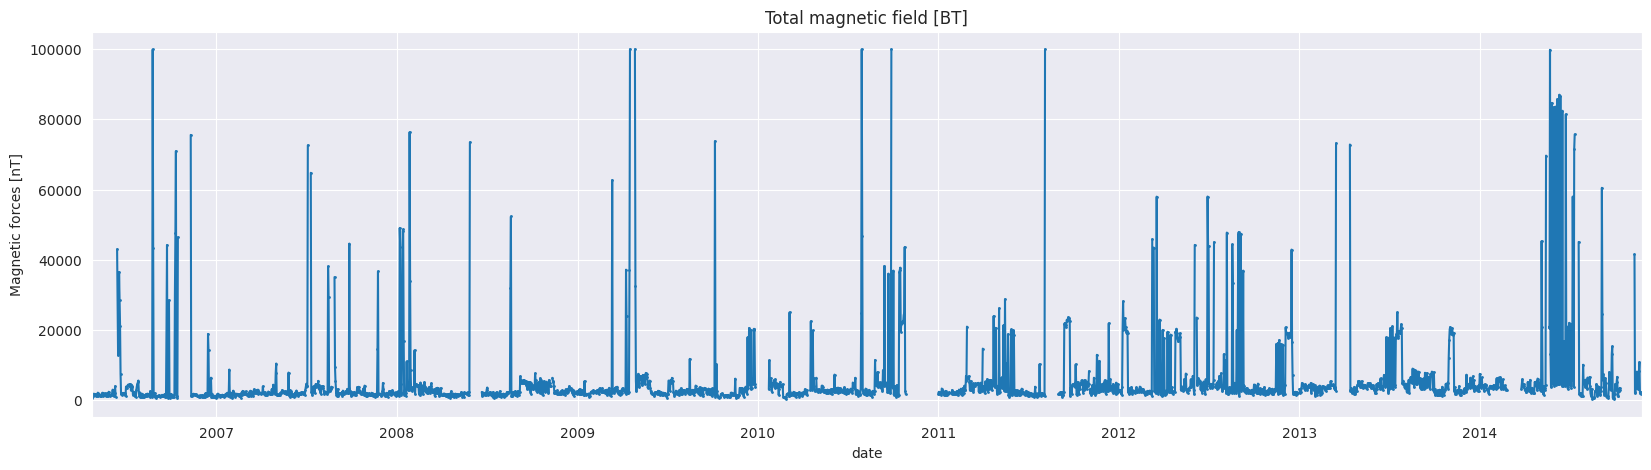

In [87]:
df['BT'].plot(figsize=(20, 5), marker='o', markersize=1, ylabel='Magnetic forces [nT]', title='Total magnetic field [BT]')
plt.show()

# Plot X-Y coordinates in solar coordinates

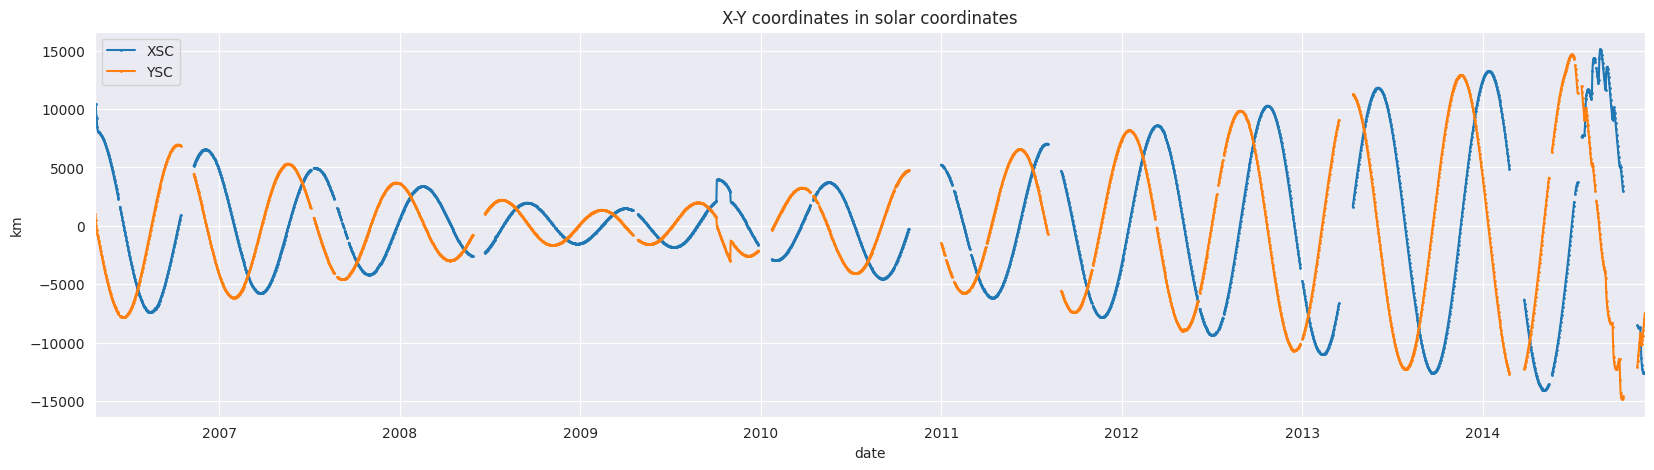

In [88]:
df[df.columns[4:6]].plot(figsize=(20, 5), marker='o', markersize=1, title= "X-Y coordinates in solar coordinates", ylabel="km")
plt.show()

# Plot the distance from the Sun

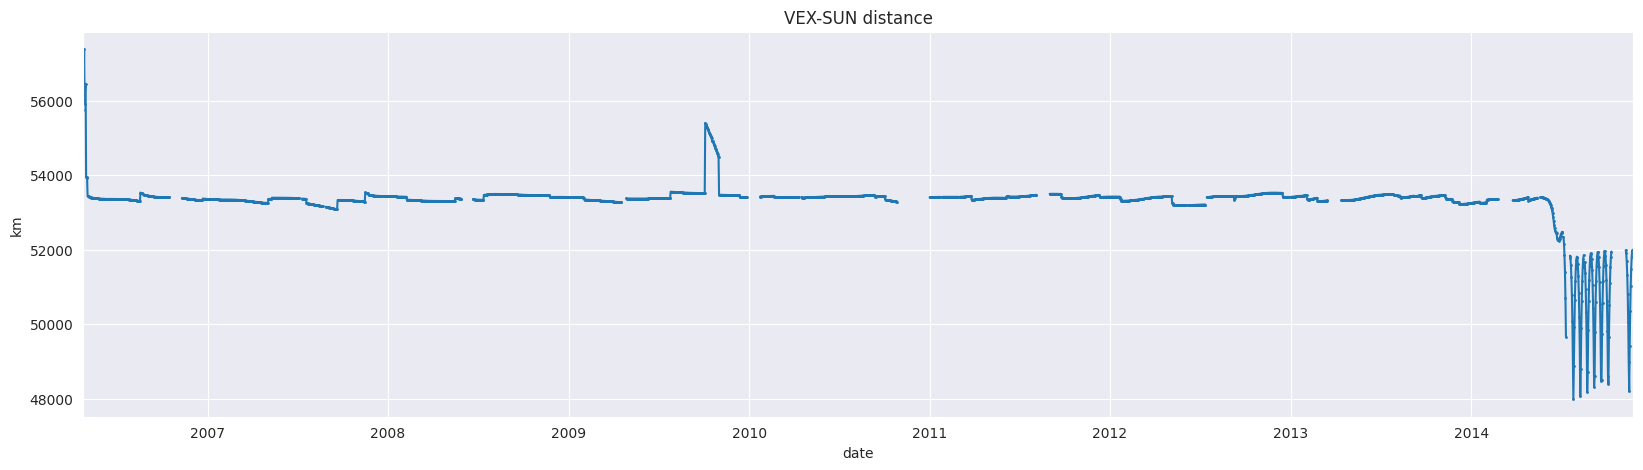

In [89]:
df['RSC'].plot(figsize=(20, 5), marker='o', markersize=1, title= "VEX-SUN distance", ylabel="km")
plt.show()